In [101]:
import os
import requests
import pandas as pd
import ipywidgets as widgets
from bs4 import BeautifulSoup
from IPython.display import display, Image
from kaggle.api.kaggle_api_extended import KaggleApi
cnames = []
api = KaggleApi()
api.authenticate()

In [102]:
#!jupyter nbextension enable --py widgetsnbextension --sys-prefix
#!jupyter serverextension enable voila --sys-prefix

In [103]:
glink = 'https://www.google.com/search?site=&tbm=isch&source=hp&biw=1873&bih=990&'
usr = { 'User-Agent': 'Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.141 Safari/537.36',
    'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8',
    'Accept-Charset': 'ISO-8859-1,utf-8;q=0.7,*;q=0.3',
    'Accept-Encoding': 'none',
    'Accept-Language': 'en-US,en;q=0.8',
    'Connection': 'keep-alive' }

In [104]:
def getimg(data, n) :
    imgname = "p" + str(n) +".png"
    url = glink + 'q=' + data + " Fictional Comic Character"
    response = requests.get(url, headers = usr)
    html = response.text
    bs = BeautifulSoup(html, 'html.parser')
    results = bs.findAll('img', {'class': 'rg_i Q4LuWd'})
    imagelinks = []
    for res in results:
        try:
            link = res['data-src']
            imagelinks.append(link)
            break
        except KeyError:
            continue
    for i,imagelink in enumerate(imagelinks):
        response = requests.get(imagelink)
        with open(imgname, 'wb') as file:
            file.write(response.content)
    img = Image(imgname)
    display(img)
    os.remove(imgname)

In [105]:
def getsts(n) :
    rand = sdf.sample()
    for cname in rand.Name :
        cnames.append(cname)
        abdf = adf.loc[adf['Name'] == cname]
        getimg(cname,n)
        abidf = abdf.loc[:,[(abdf[col] == True).all() for col in abdf.columns]]
        rand['Abilities'] = ", ".join(abidf)
        tr = rand.transpose()
        tr.columns = tr.iloc[0] 
        tr = tr[1:]
        display(tr)

In [106]:
def getviz(p3,p4):
    if p3.iat[6,0] > p3.iat[6,1]:
        ttl = cnames[0] + " wins against " + cnames[1]
    elif p3.iat[6,0] < p3.iat[6,1]:
        ttl = cnames[1] + " wins against " + cnames[0]
    else :
        ttl = cnames[1] + " and " + cnames[0] + "are equal in Powers"
    plot = p4.plot(y = None, kind = 'barh', stacked = True, title = ttl, mark_right = True)
    fig = plot.get_figure()

In [107]:
def getdiff(cnames):
    p1 = sdf.loc[sdf['Name'] == cnames[0]]
    p1 = p1.drop(columns=["Name", "Alignment"])
    p2 = sdf.loc[sdf['Name'] == cnames[1]]
    p2 = p2.drop(columns=["Name", "Alignment"])
    p3 = pd.concat([p1 , p2]).transpose()
    p3.rename(columns = {p1.index[0] : cnames[0], p2.index[0] : cnames[1]}, inplace = True)
    p4 = p3.div(p3.sum(axis=1), axis=0)
    getviz(p3,p4)

In [108]:
api.dataset_download_file('dannielr/marvel-superheroes', 'charcters_stats.csv')
api.dataset_download_file('dannielr/marvel-superheroes', 'superheroes_power_matrix.csv')
os.rename("charcters_stats.csv", "stats.csv")
os.rename("superheroes_power_matrix.csv", "abilities.csv")

In [109]:
stats = pd.read_csv("stats.csv")
stats = stats[stats['Total'] > 5]
abilities = pd.read_csv("abilities.csv")
df = stats.merge(abilities, on=['Name'])
sdf = stats[stats.Name.isin(df.Name)]
adf = abilities[abilities.Name.isin(df.Name)]

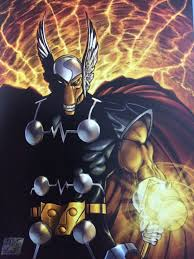

Name,Beta Ray Bill
Alignment,good
Intelligence,63
Strength,80
Speed,35
Durability,95
Power,100
Combat,84
Total,457
Abilities,"Accelerated Healing, Super Strength, Stamina, ..."


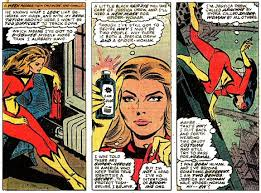

Name,Spider-Woman
Alignment,good
Intelligence,50
Strength,42
Speed,42
Durability,32
Power,62
Combat,52
Total,280
Abilities,"Agility, Durability, Flight, Super Strength, E..."


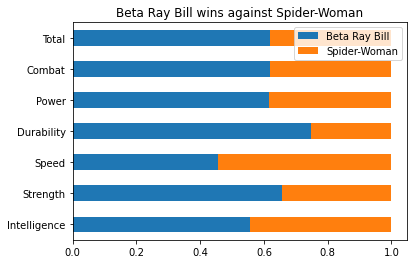

In [110]:
# n = int(input("Enter no. of Characters : "))
n = 2
for i in range(1,n+1):
    getsts(i)
if n == 2:
    getdiff(cnames)
os.remove("stats.csv")
os.remove("abilities.csv")